# Predator-prey interaction simulations

In [1]:
%load_ext autoreload
%autoreload 2

import sys
sys.path.insert(0, '../code')

# Nice fonts
import matplotlib.font_manager
import matplotlib
prop = matplotlib.font_manager.FontProperties(fname="c:\\windows\\fonts\\nunitosans-light.ttf")
matplotlib.rcParams['font.family'] = prop.get_name()
matplotlib.rcParams['font.weight'] = 'light'
matplotlib.rcParams['axes.facecolor'] = '#fbfbfb'

import numpy as np
import matplotlib.pyplot as plt
from predators import *
from tqdm import tqdm

np.random.seed(123)

## Create agents

Here they are both reward function based

In [171]:
predator = Agent('1*Prey_1 + (-0.7*Shadow) + 0.3*Water', name='Predator_1', policy='pessimism', w=0.5)
prey = Agent('1*reward + (-1*Predator_1)', name='Prey_1', policy='pessimism', w=0.5)

## Create environment

(7, 1)


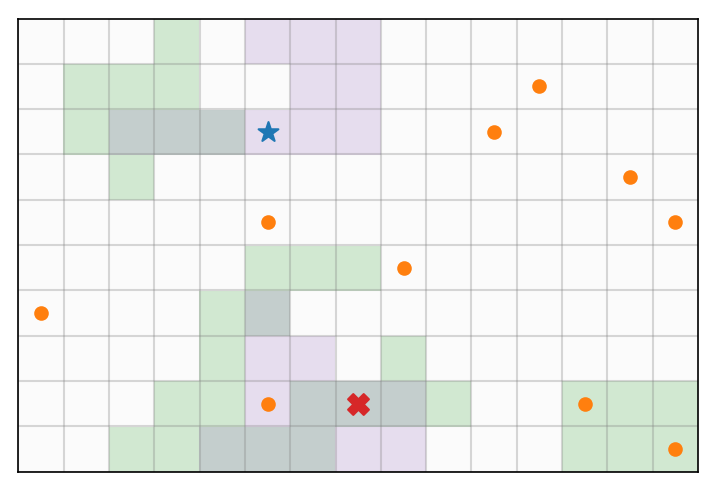

In [172]:
f1 = EnvironmentFeature(n_clusters=3, cluster_size_mean=15, cluster_size_sd=10, name='Water')
f2 = EnvironmentFeature(n_clusters=4, cluster_size_mean=10, cluster_size_sd=10, name='Shadow')

env = PredatorEnvironment(features=[f1, f2], n_rewards=10, agents=[predator, prey], name='Environment_1')
env.plot_environment()

In [173]:
# import copy
# features = copy.deepcopy(env.feature_arrays)

In [176]:
# env.feature_arrays = features
prey.move_to_idx(12, 9)
predator.move_to_idx(4, 9)
prey.move_history = []
predator.move_history = []

(4, 9)


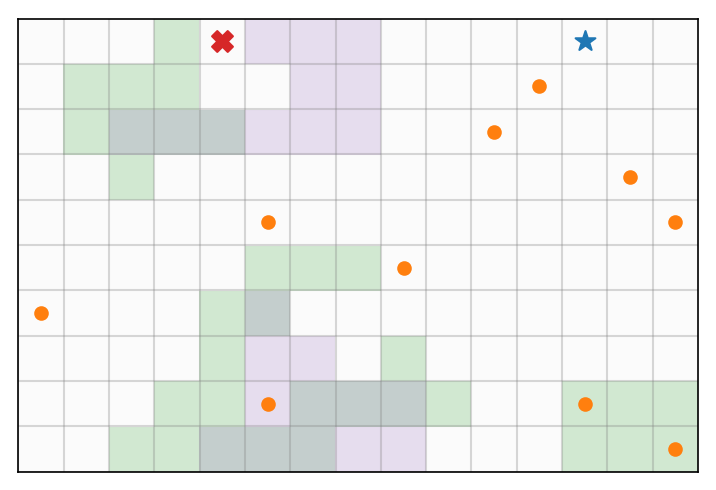

In [177]:
env.plot_environment()

In [178]:
prey.solved = False
predator.solved = False

## Predator value function & initial policy

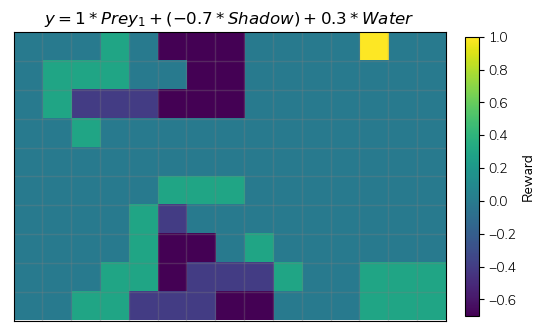

In [179]:
predator.plot_state_rewards()

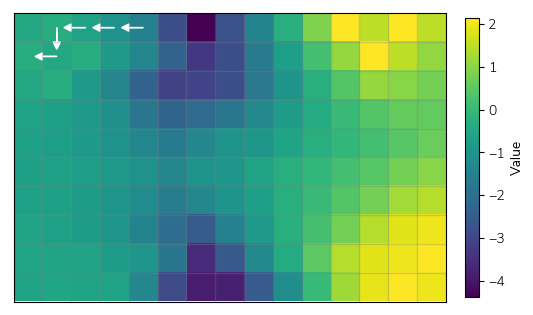

In [180]:
predator.plot_policy()

## Prey value function & initial policy

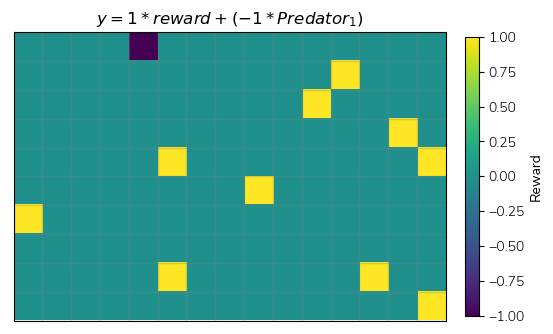

In [181]:
prey.plot_state_rewards()

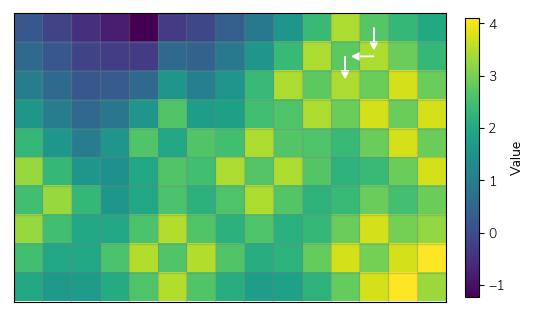

In [182]:
prey.plot_policy()

  0%|                                                                                           | 0/10 [00:00<?, ?it/s]

REWARDED


 30%|████████████████████████▉                                                          | 3/10 [00:08<00:18,  2.70s/it]

REWARDED


 70%|██████████████████████████████████████████████████████████                         | 7/10 [00:22<00:09,  3.26s/it]

REWARDED


 90%|██████████████████████████████████████████████████████████████████████████▋        | 9/10 [00:28<00:03,  3.21s/it]

REWARDED


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:31<00:00,  3.20s/it]


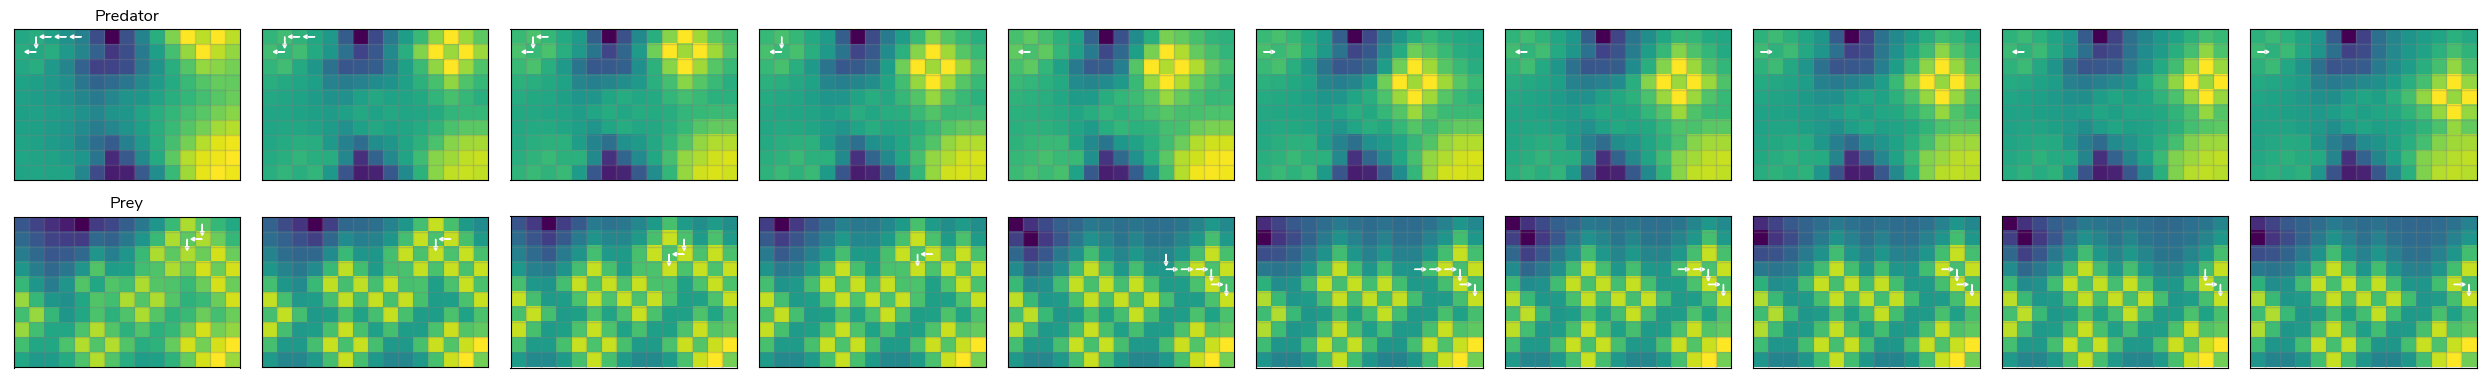

In [183]:
f, ax = plt.subplots(2, 10, figsize=(25, 4), dpi=100)

ax[0, 0].set_title('Predator')
ax[1, 0].set_title('Prey')

predator.solver.max_iter = 10
prey.solver.max_iter = 10

predator_vmin = predator.solver.V.min().copy()
predator_vmax = predator.solver.V.max().copy()
prey_vmin = prey.solver.V.min().copy()
prey_vmax = prey.solver.V.max().copy()

for n in tqdm(range(10)):
    for i in range(2):
        ax[i, n].set_xticklabels([])
        ax[i, n].set_yticklabels([])
        ax[i, n].xaxis.set_ticks_position('none') 
        ax[i, n].yaxis.set_ticks_position('none') 
    
    # Predator
    predator.plot_policy(ax=ax[0, n], cbar=False)
    
    # Prey
    prey.plot_policy(ax=ax[1, n], cbar=False)
    
    predator.move()
    prey.move()
    
    
plt.tight_layout()

## THREAT SPREAD IS PROBLEMATIC

E.g. predator's dislike of water shouldn't spread